### Global Climate Change Data

### Scopo del progetto: 
Usando il file <b>Global Health Nutrition Data.csv</b> (in particolare i files <b>GlobalTemperatures.csv</b>, <b>GlobalLandTemperaturesByCity.csv</b> e <b>GlobalLandTemperaturesByCountry.csv</b>) sono state implementate diverse funzioni per poter effettuare un'analisi del cambiamento climatico. Nello specifico sono stati realizzati dei grafici per visualizzare come le temperature medie di un determinato mese siano variate nel corso degli anni.
Dati: 
• AverageTemperature
• AverageLandTemperature
• Country
• City
• Date (Year-Month-Day)

Scelte progettuali: 
Nei tre files .csv utilizzati sono presenti le temperature medie e le relative incertezze. Per poter visualizzare in maniera ottimale i diversi grafici, quest'ultime non sono state considerate. Il motivo di questa scelta è che altrimenti il grafico vero e proprio verrebbe "nascosto" dalla presenza delle incertezze; di conseguenza, la visione e la comprensione del grafico risulterebbe complicata. 
Inoltre, il progetto è stato suddiviso nel seguente modo: 
• il file "globalTemperatures.ipynb" contiene le funzioni implementate per "GlobalTemperatures.csv"
• il file "temperatureByCity.ipynb" contiene le funzioni implementate per "GlobalLandTemperaturesByCity.csv"
• il file "temperatureByCountry.ipynb" contiene le funzioni implementate per "GlobalLandTemperaturesByCountry.csv"
• il file "utilities.py" contiene l'implementazione di funzioni in comune, tra cui "regressionLine(x, y, title)" per la costruzione della retta di regressione. 

Inoltre, si è deciso che per la costruzione dei grafici si potesse inserire da input il mese d'interesse, mentre la città o la nazione non sono scelte dall'utente ma in modo randomico. Il motivo è per facilitare la realizzazione dei grafici, in quanto all'interno del dataset sono presenti molte istanze di città e nazioni. In un'eventuale release futura dell'applicazione potrà essere inserita come nuova feature la scelta di tali parametri da parte dell'utente.  


In questo file (globalTemperatures.ipynb):

Prelevando i dati dal file GlobalTemperatures.csv
Costruire funzioni per:
• Graficare l’andamento della temperatura per ogni anno per un determinato mese (es. Agosto)
• Calcolare la retta di regressione

La funzione da eseguire è "globalTemperatures(dataset_globalTemperatures)".
Vi è un'unica funzione per entrambi i task in quanto per la costruzione della retta di regressione necessita di parametri in input precedentemente calcolati.

In [1]:
import calendar
from random import random, choice

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilities

In [2]:
datasetPath1 = './GlobalTemperatures.csv'

dataset_temperature = pd.read_csv(datasetPath1)

dataset_globalTemperatures = pd.DataFrame(dataset_temperature, columns=['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
                                         'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
                                         'LandMinTemperature',
                                         'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
                                         'LandAndOceanAverageTemperatureUncertainty'])


In [3]:
def lineGraphGlobalTemperature(dataset_globalTemp):
    print("\nGrafico per l'andamento della temperatura per ogni anno per un determinato mese\n")
    month = utilities.chooseMonth()
    print("Mese selezionato = ", calendar.month_name[month])

    #Elimino le colonne non utilizzate nel grafico, ossia tutte tranne 'dt' e 'LandAverageTemperature'
    dataset_globalTemp.drop(['LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty'], axis = 1, inplace=True)
    
    #Elimino i valori NaN dal dataset
    dataset_globalTemp.dropna(inplace=True)
    dataset_globalTemp.reset_index(drop = True, inplace= True)


    avgTemperatures = []
    years = []

    index=0

    #Recupero le temperature per ogni anno per il mese selezionato
    for date in dataset_globalTemp['dt']:
        parsedMonth = int(date[5:-3])
        # print("parsed month: ",parsedMonth)
        if parsedMonth == month:
            years.append(np.float64(date[:-6]))
            avgTemperatures.append(dataset_globalTemp['LandAverageTemperature'][index])
        index=index+1
        
    #print("--> temperature: ", avgTemperatures, "\n--> len: ", len(avgTemperatures))

    #Grafico
    fig = plt.figure()
    plt.plot(years, avgTemperatures)

    plt.title("Land Average Temperature in the month of " + calendar.month_name[month])
    plt.xlabel("Years")
    plt.ylabel("Temperature")
    plt.show()

    return years, avgTemperatures, calendar.month_name[month]

In [4]:
def globalTemperatures(dataset_globalTemperatures):
    """
    Funzione relativa al GlobalTemperatures.csv per:
    - Graficare l’andamento della temperatura per ogni anno per un determinato mese (es. Agosto)
    - Calcolare la retta di regressione
    :param dataset_globalTemperatures: dataset
    """
    x, y , month= lineGraphGlobalTemperature(dataset_globalTemperatures)
    title = "Regression Line of Average Temperature - " + month

    utilities.regressionLine(x, y, title)


Grafico per l'andamento della temperatura per ogni anno per un determinato mese

Inserire numero mese per visualizzare grafico:
 - Gennaio: 1
 - Febbraio: 2
 - Marzo: 3
 - Aprile: 4
 - Maggio: 5
 - Giugno: 6
 - Luglio: 7
 - Agosto: 8
 - Settembre: 9
 - Ottobre: 10
 - Novembre: 11
 - Dicembre: 12

Inserire un numero tra quelli elencati:


 11


Mese selezionato =  November


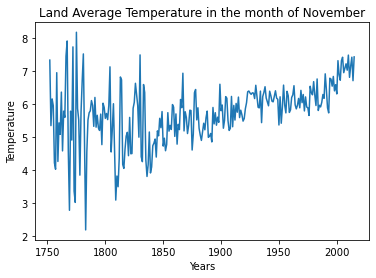


m:  0.0055528226884672596 b: -4.716336230697776


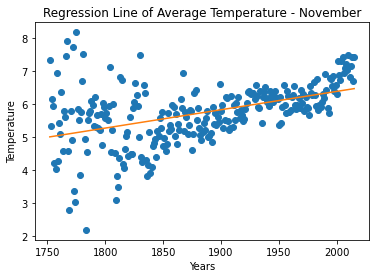

In [5]:
globalTemperatures(dataset_globalTemperatures)